In [18]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [7]:
data_path = Path('..') / 'data' / 'Advertising.csv'
df = pd.read_csv(data_path)

In [8]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<Axes: xlabel='total_spend', ylabel='TV'>

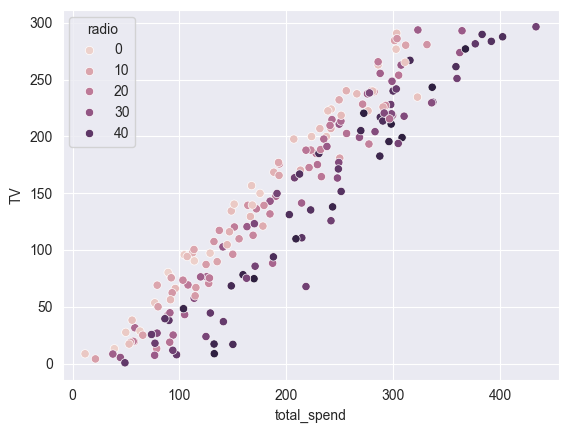

In [9]:
sns.scatterplot(data=df, x='total_spend', y='TV', hue='radio')

<Axes: xlabel='total_spend', ylabel='sales'>

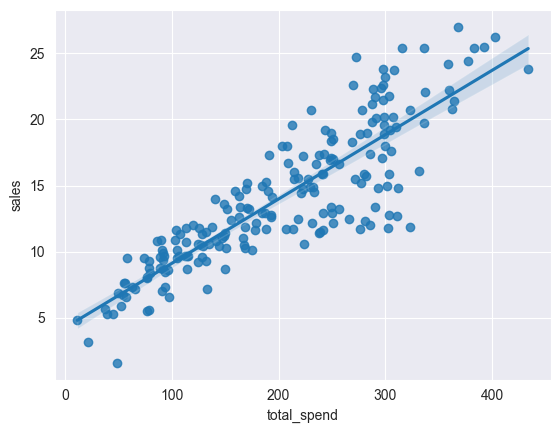

In [11]:
sns.regplot(data=df, x='total_spend', y='sales')

In [12]:
X = df['total_spend']
y = df['sales']

In [14]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [15]:
potential_spend = np.linspace(0, 500, 100)

In [16]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

<Axes: xlabel='total_spend', ylabel='sales'>

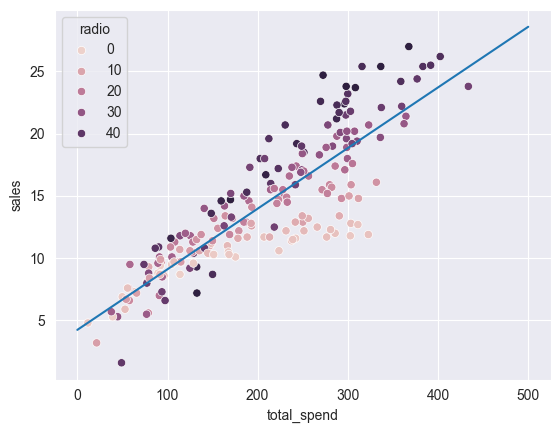

In [20]:
plt.plot(potential_spend, predicted_sales)
sns.scatterplot(data=df, x='total_spend', y='sales', hue='radio')

In [24]:
spend = 200
predicted_sales = 0.04868788 * potential_spend + 4.24302822

In [25]:
predicted_sales

array([ 4.24302822,  4.4889266 ,  4.73482499,  4.98072337,  5.22662176,
        5.47252014,  5.71841852,  5.96431691,  6.21021529,  6.45611367,
        6.70201206,  6.94791044,  7.19380883,  7.43970721,  7.68560559,
        7.93150398,  8.17740236,  8.42330075,  8.66919913,  8.91509751,
        9.1609959 ,  9.40689428,  9.65279266,  9.89869105, 10.14458943,
       10.39048782, 10.6363862 , 10.88228458, 11.12818297, 11.37408135,
       11.61997974, 11.86587812, 12.1117765 , 12.35767489, 12.60357327,
       12.84947165, 13.09537004, 13.34126842, 13.58716681, 13.83306519,
       14.07896357, 14.32486196, 14.57076034, 14.81665873, 15.06255711,
       15.30845549, 15.55435388, 15.80025226, 16.04615064, 16.29204903,
       16.53794741, 16.7838458 , 17.02974418, 17.27564256, 17.52154095,
       17.76743933, 18.01333771, 18.2592361 , 18.50513448, 18.75103287,
       18.99693125, 19.24282963, 19.48872802, 19.7346264 , 19.98052479,
       20.22642317, 20.47232155, 20.71821994, 20.96411832, 21.21

In [26]:
np.polyfit(X, y, deg=1)

array([0.04868788, 4.24302822])

In [27]:
pot_spend = np.linspace(0, 500, 100)

In [29]:
pred_sales = 3.07615033e-07 * pot_spend**3 -1.89392449e-04 * pot_spend**2 + 8.20886302e-02 * pot_spend + 2.70495053e+00

In [30]:
pred_sales

array([ 2.70495053,  3.11474825,  3.51512186,  3.90630911,  4.28854779,
        4.66207567,  5.02713053,  5.38395013,  5.73277224,  6.07383466,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107318,
        7.97057059,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998503,
        9.38138371,  9.64787596,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506288, 11.15710981, 11.39591473, 11.63171541,
       11.86474963, 12.09525515, 12.32346975, 12.54963121, 12.77397729,
       12.99674578, 13.21817443, 13.43850104, 13.65796337, 13.87679919,
       14.09524628, 14.31354241, 14.53192536, 14.75063289, 14.96990278,
       15.18997281, 15.41108075, 15.63346437, 15.85736144, 16.08300974,
       16.31064705, 16.54051112, 16.77283975, 17.0078707 , 17.24584174,
       17.48699065, 17.73155521, 17.97977318, 18.23188233, 18.48812045,
       18.74872531, 19.01393467, 19.28398632, 19.55911802, 19.83956755,
       20.12557268, 20.41737119, 20.71520085, 21.01929943, 21.32

<Axes: xlabel='total_spend', ylabel='sales'>

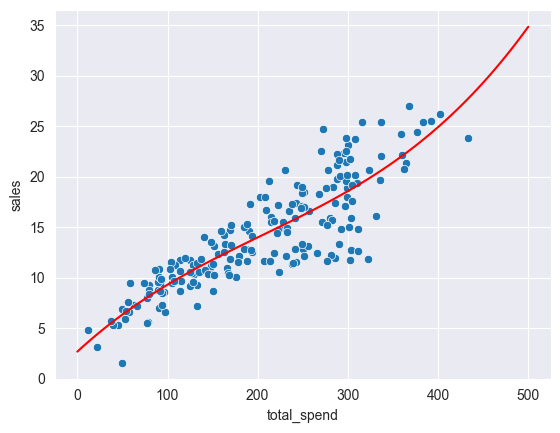

In [34]:
plt.plot(pot_spend, pred_sales, color='red')
sns.scatterplot(data=df, x='total_spend', y='sales')

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

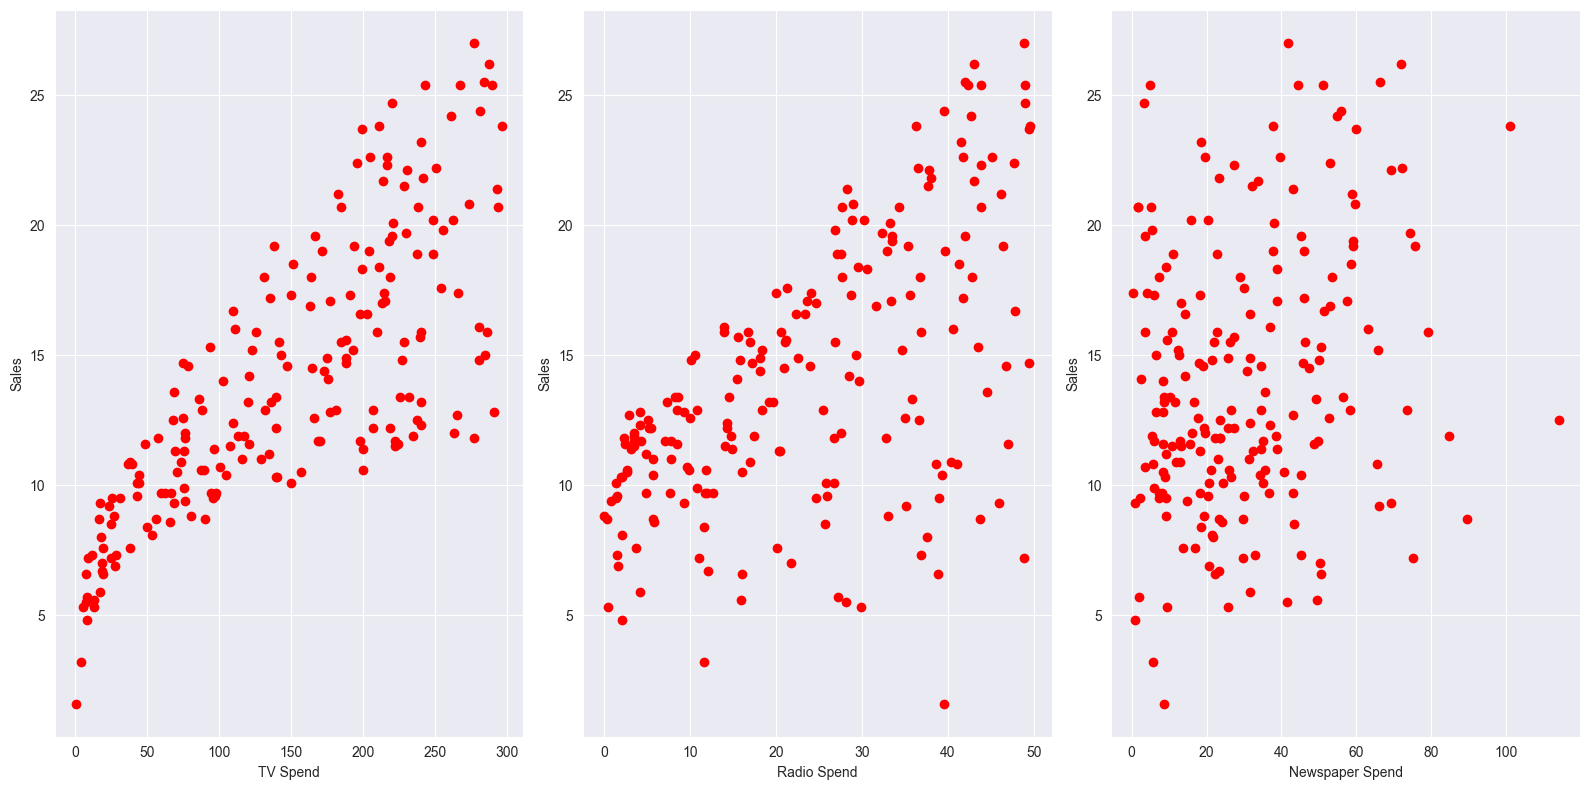

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 8))

axes[0].plot(df['TV'], df['sales'], 'o', color='red')
axes[0].set_ylabel('Sales')
axes[0].set_xlabel('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o', color='red')
axes[1].set_ylabel('Sales')
axes[1].set_xlabel('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o', color='red')
axes[2].set_ylabel('Sales')
axes[2].set_xlabel('Newspaper Spend')

plt.tight_layout()

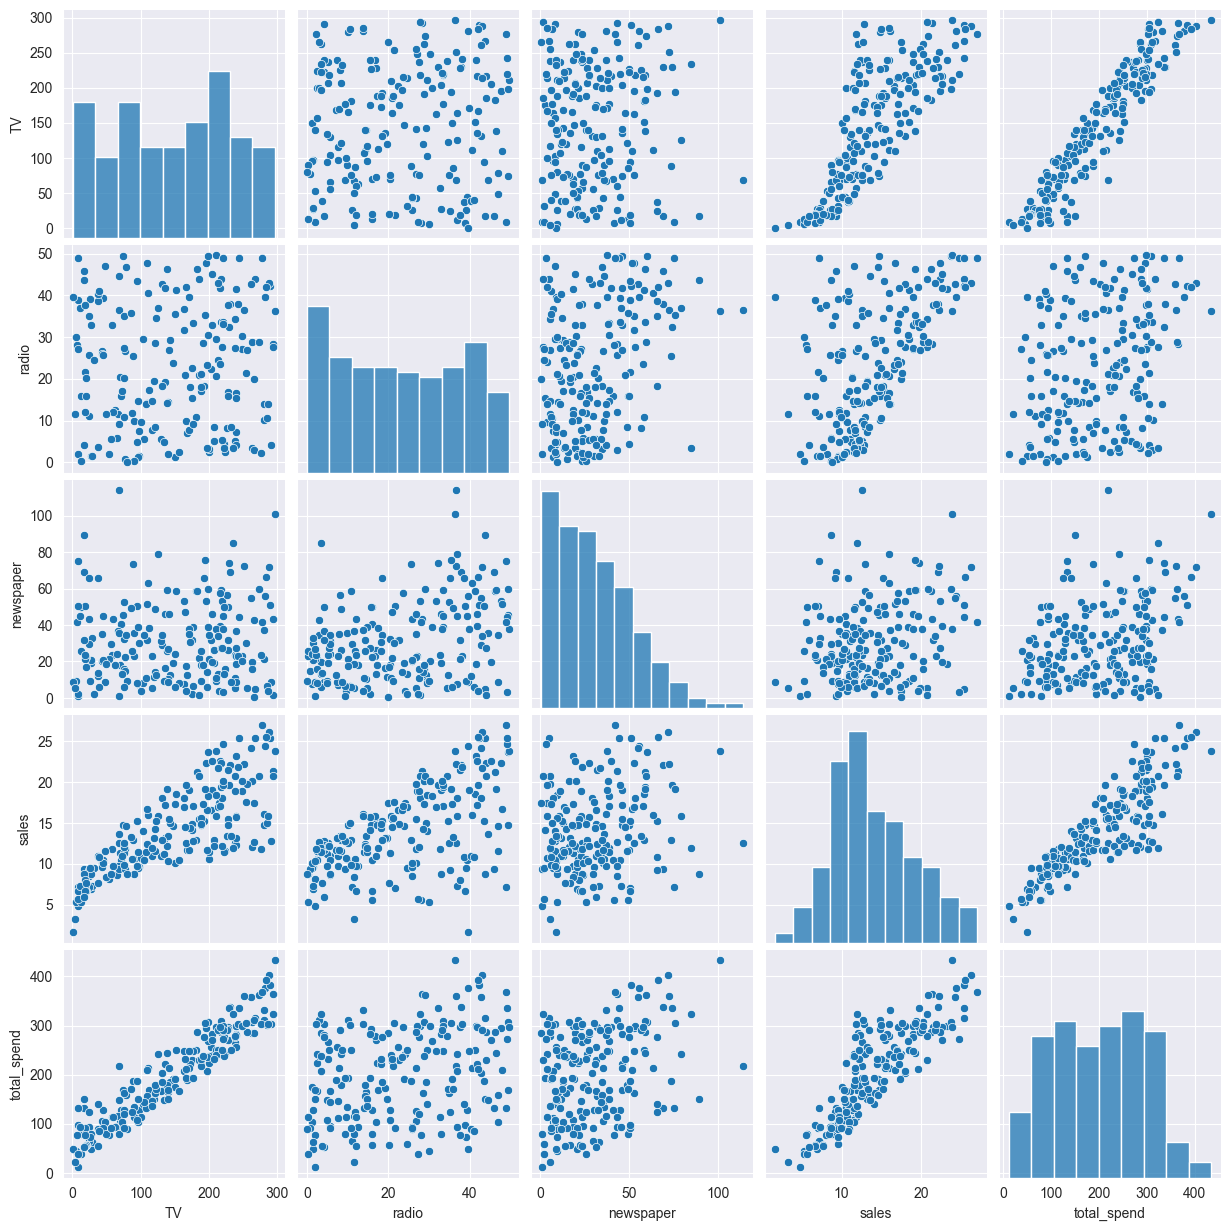

In [43]:
sns.pairplot(df)

In [45]:
X = df.drop('sales', axis=1)

In [46]:
y = df['sales']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
model = LinearRegression()

In [51]:
model.fit(X_train, y_train)

LinearRegression()

In [52]:
test_predictions = model.predict(X_test)

In [54]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

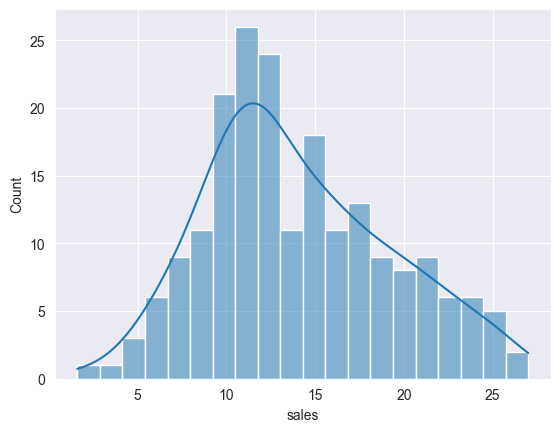

In [58]:
sns.histplot(data=df, x='sales', bins=20, kde=True)

In [59]:
mean_absolute_error(y_test, test_predictions)

1.5116692224549084

In [60]:
np.sqrt(mean_squared_error(y_test, test_predictions))

1.9485372043446387

In [61]:
import scipy as sp

In [63]:
test_residuals = y_test - model.predict(X_test)

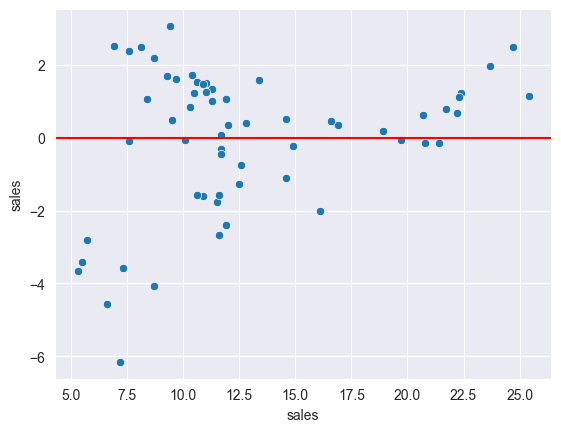

In [71]:
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='red')

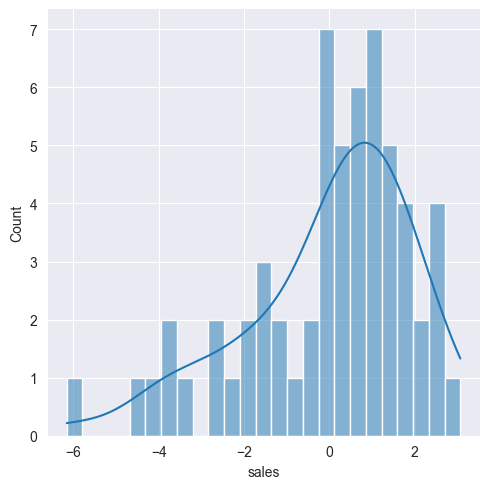

In [72]:
sns.displot(test_residuals, bins=25, kde=True)

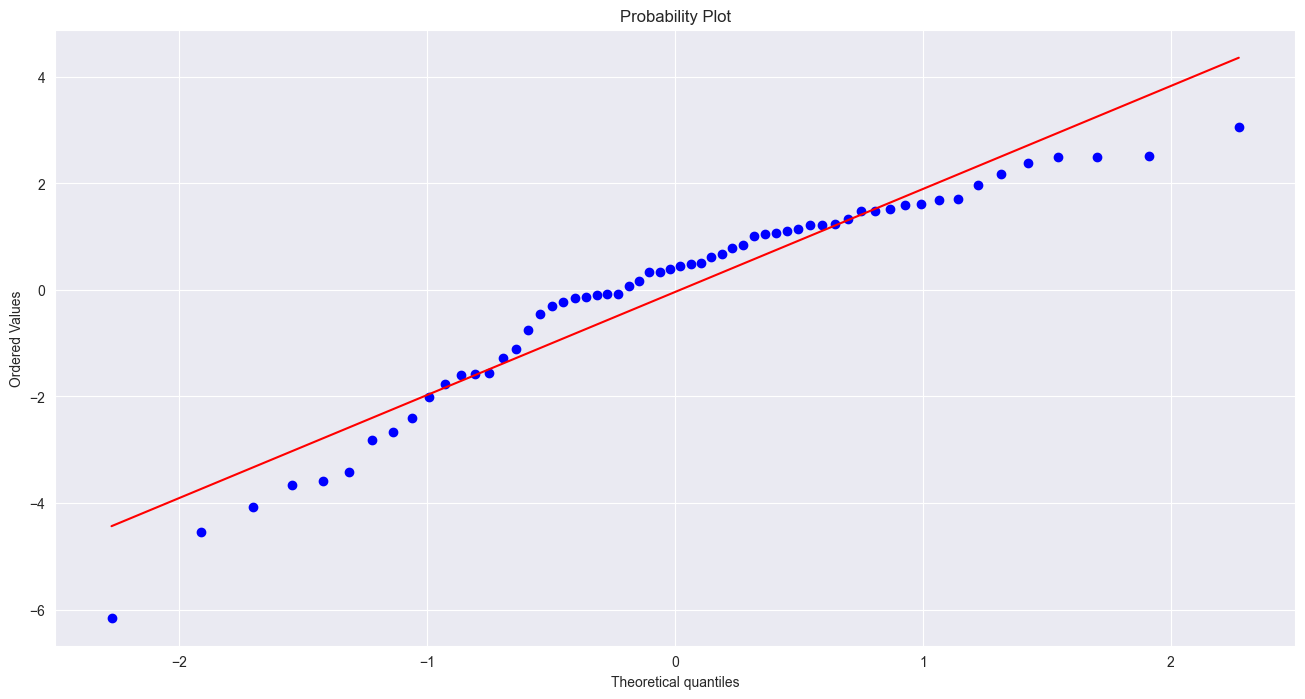

In [74]:
fig, ax = plt.subplots(figsize=(16, 8))
_ = sp.stats.probplot(test_residuals, dist='norm', plot=ax)